In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_linnerud

X,y = load_linnerud(return_X_y=True)

In [27]:
df1=pd.DataFrame(X, columns=["Weight","Waist","Pules"])
df2=pd.DataFrame(y, columns=["chins","sit_ups","jumps"])


In [4]:
data=pd.merge(df1,df2,left_index=True,right_index=True)
data

,Weight,Waist,Pules,chins,sit_ups,jumps
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [5]:
data.describe()

,Weight,Waist,Pules,chins,sit_ups,jumps
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Weight,Waist,Pules,chins,sit_ups,jumps
0,0.018879,0.611665,0.226543,0.721160,0.135926,0.188785
1,0.008490,0.466932,0.254690,0.802275,0.157059,0.220732
2,0.047960,0.403668,0.403668,0.771365,0.151875,0.231809
3,0.057305,0.501418,0.176690,0.773616,0.167139,0.296075
4,0.050366,0.600523,0.224712,0.732250,0.135602,0.178220


In [8]:
data_scaled.describe()

,Weight,Waist,Pules,chins,sit_ups,jumps
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.035657,0.545613,0.253593,0.709532,0.141032,0.222985
std,0.018913,0.164000,0.124030,0.145711,0.027887,0.048817
min,0.003763,0.188143,0.125785,0.392772,0.084165,0.142826
25%,0.019814,0.442738,0.175722,0.607527,0.114154,0.187543
50%,0.037108,0.559316,0.221632,0.739900,0.152035,0.219223
75%,0.048562,0.662978,0.291790,0.806137,0.163021,0.254427
max,0.077313,0.776221,0.637616,0.929426,0.186162,0.345619


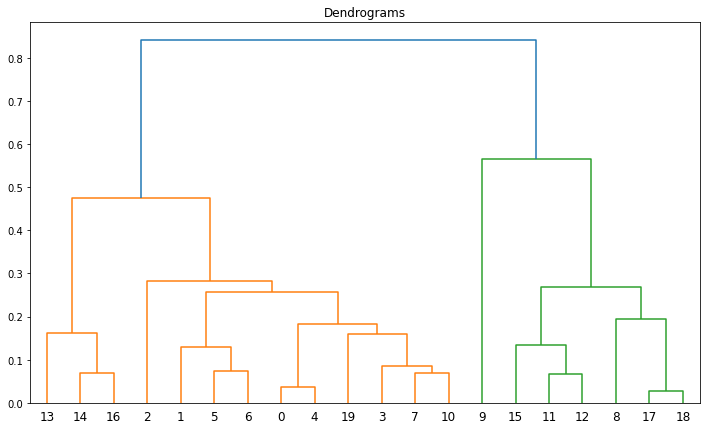

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'complete'))

apply hierarchical clustering for 2 clusters:

In [51]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

 0 represents the points that belong to the first cluster and 1 represents points in the second cluster
 Cluster Visualization

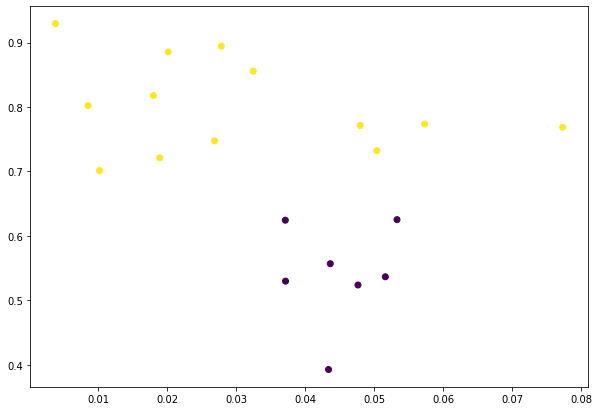

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Weight'], data_scaled['chins'],c=cluster.labels_)

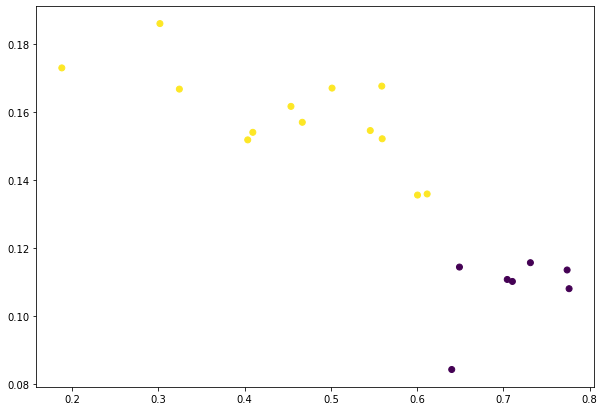

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Waist'], data_scaled['sit_ups'],c=cluster.labels_)

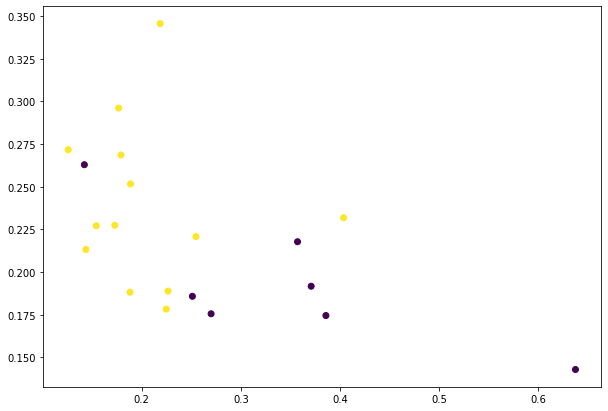

In [48]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Pules'],data_scaled['jumps'],c=cluster.labels_)